In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [222]:
# import the data 
iris = pd.read_csv(r'./iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [223]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [224]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [225]:
#Checking duplicates and dropping them
iris.duplicated().sum()

2

In [226]:
iris.drop_duplicates(inplace=True)

In [227]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [228]:
iris[iris['petal_width_cm'].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [229]:
# replace nan value with the interploate value 

iris_inter = iris.interpolate(inplace=False)

In [230]:
iris_inter[7:12]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.266667,Iris-setosa
8,4.4,2.9,1.4,0.233333,Iris-setosa
9,4.9,3.1,1.5,0.200000,Iris-setosa
10,5.4,3.7,1.5,0.166667,Iris-setosa
11,4.8,3.4,1.6,0.133333,Iris-setosa


In [231]:
iris_inter['petal_width_cm'][7:12] = iris_inter['petal_width_cm'][7:12].round(decimals = 1)
iris_inter[7:12]

/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_4310/3453957756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_inter['petal_width_cm'][7:12] = iris_inter['petal_width_cm'][7:12].round(decimals = 1)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.3,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.1,Iris-setosa


In [232]:
#checking different values in class column
iris_inter['class'].value_counts()

Iris-virginica     49
Iris-setosa        48
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [233]:
#as we have different strings but with the same meaning, group the rows in the proper class column name

iris_inter['class'].loc[(iris_inter['class'] == 'versicolor')] = 'Iris-versicolor'
iris_inter['class'].loc[(iris_inter['class'] == 'Iris-setossa')] = 'Iris-setosa'
iris_inter['class'].value_counts()

/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_4310/3933647826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_inter['class'].loc[(iris_inter['class'] == 'versicolor')] = 'Iris-versicolor'
/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_4310/3933647826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_inter['class'].loc[(iris_inter['class'] == 'Iris-setossa')] = 'Iris-setosa'


Iris-versicolor    50
Iris-setosa        49
Iris-virginica     49
Name: class, dtype: int64

In [234]:
iris_inter.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,148.000000,148.000000,148.000000,148.000000
mean,5.648608,3.056757,3.764865,1.204730
std,1.320186,0.435056,1.763109,0.763124
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


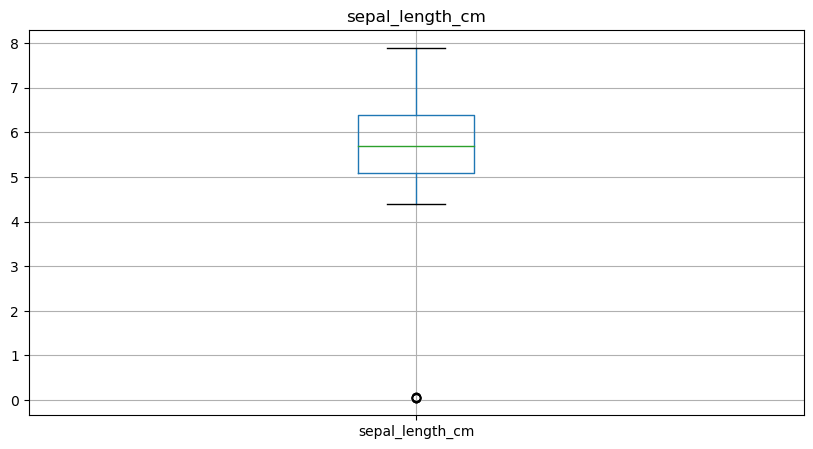

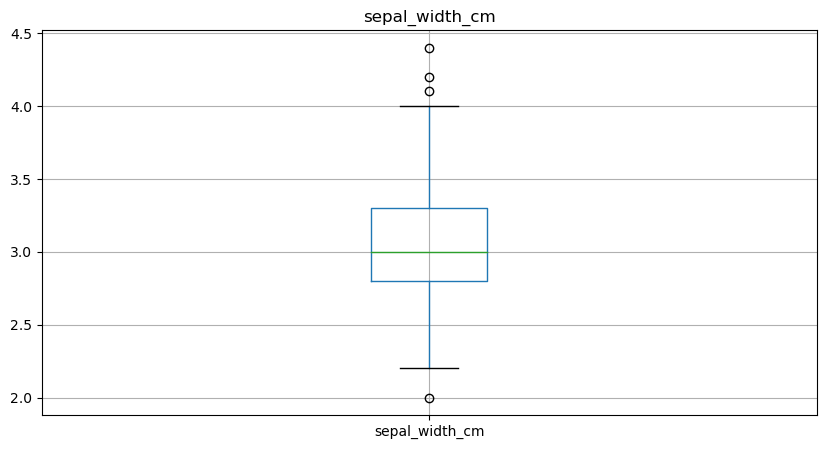

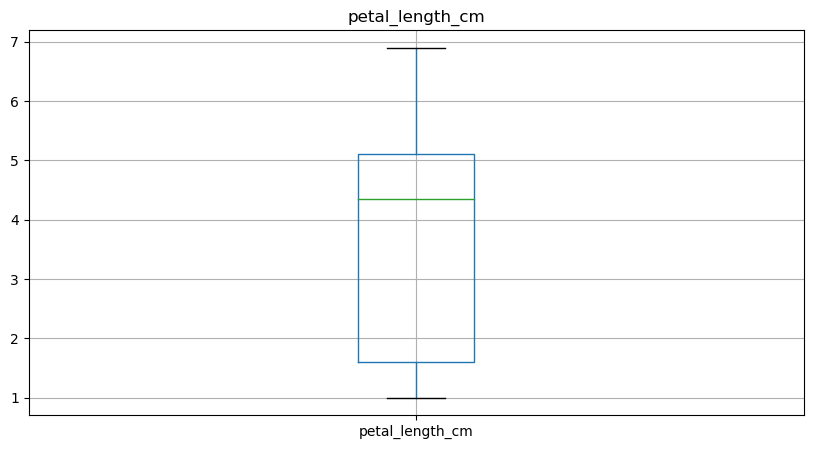

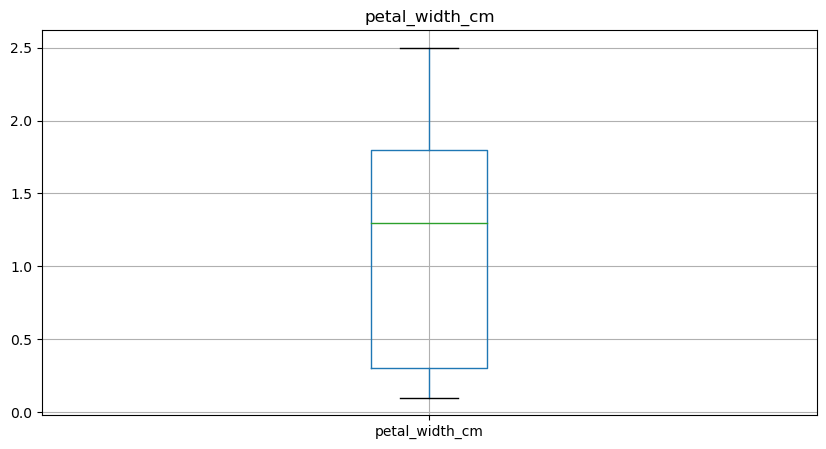

In [235]:
# Let's check the outliers though the box plot 

num_iris = iris_inter.select_dtypes(exclude=['object'])

for col in num_iris:
    plt.figure(figsize=(10, 5))
    num_iris.boxplot(column=[col])
    plt.title(col)

In [236]:
# we have some outliers but it can happen. Maybe it is a flower just growing as a new one so let's keep them as they are not outliers very far from the mean

In [237]:
# As we are preparing the dataset to be worked in Machine Learning models, we have to encode the object column 'class'

In [238]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()


In [239]:
# to have a dict of class & encode 
lable.fit(iris_inter['class'])
label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
print(label_name_mapping)

#Encode class col
iris_inter['class']=lable.fit_transform(iris_inter['class'])
iris_inter

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,2.3,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [240]:
iris_inter.to_csv(r'./iris_clean.csv')

# Machine learning models

In [241]:
x = iris_inter.drop(['class'], axis=1)
y = iris_inter['class']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(148, 4)
(148,)


In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88, 4)
(88,)
(60, 4)
(60,)


KNN model

In [243]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [244]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147] TEST: [  0   1   2   3   4   5   6   7   8   9  49  50  51  52  53  54  55  56
  57  58  99 100 101 102 103 104 105 106 107 108]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 119
 120 121 122

------------- 1 -------------------
[[19  0  0]
 [ 0 21  3]
 [ 0  0 17]]
------------- 2 -------------------
[[19  0  0]
 [ 0 21  3]
 [ 0  0 17]]
------------- 3 -------------------
[[19  0  0]
 [ 0 21  3]
 [ 0  0 17]]
------------- 4 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 5 -------------------
[[19  0  0]
 [ 0 22  2]
 [ 0  0 17]]
------------- 6 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 7 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 8 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 9 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 10 -------------------
[[19  0  0]
 [ 0 23  1]
 [ 0  0 17]]
------------- 11 -------------------
[[19  0  0]
 [ 1 21  2]
 [ 0  0 17]]
------------- 12 -------------------
[[19  0  0]
 [ 1 21  2]
 [ 0  0 17]]
------------- 13 -------------------
[[19  0  0]
 [ 1 20  3]
 [ 0  0 17]]
------------- 14 -------------------
[[19  0  0

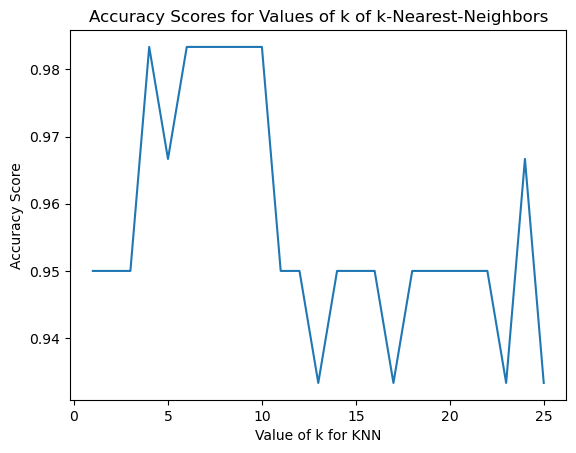

In [245]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Decision tree

In [246]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.950


In [247]:
tree.feature_importances_

array([0.        , 0.        , 0.06354144, 0.93645856])

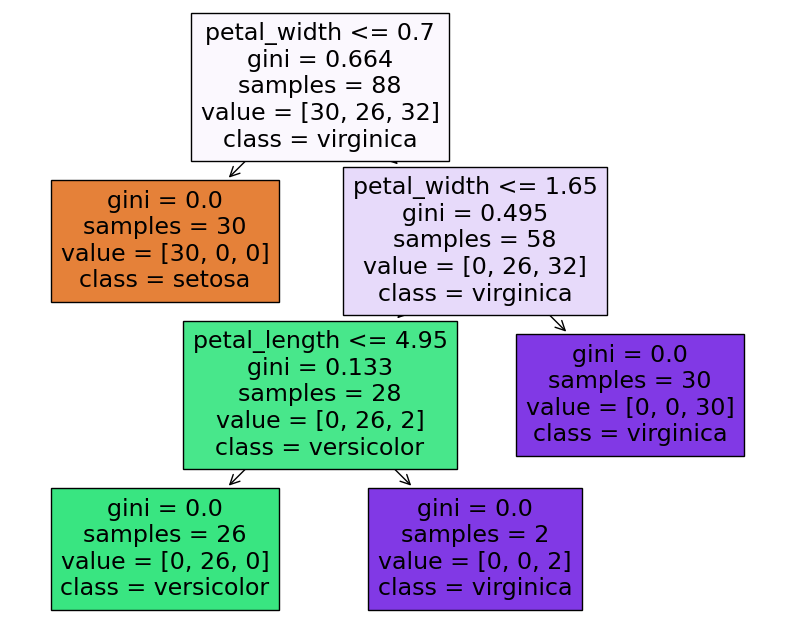

In [248]:
plt.figure(figsize = (10,8))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


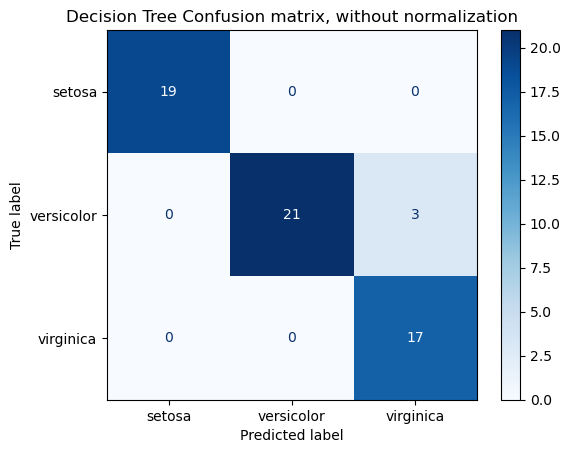

In [249]:
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [250]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy for Radius Neighbors Classifier is: 65.0 %

The classification report for Radius Neighbors Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.12      0.22        24
           2       0.45      1.00      0.62        17

    accuracy                           0.65        60
   macro avg       0.82      0.71      0.61        60
weighted avg       0.84      0.65      0.58        60



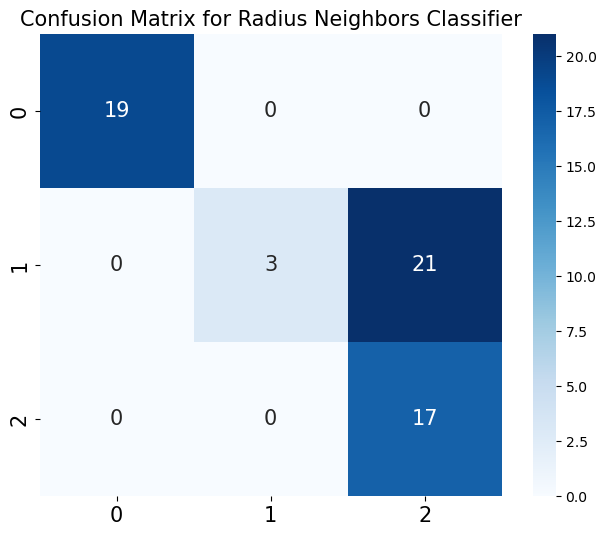

In [260]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=5)  #radious to solve if you don't have enough neighbors 
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')



In [261]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is: 95.0 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.88      0.93        24
           2       0.85      1.00      0.92        17

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60



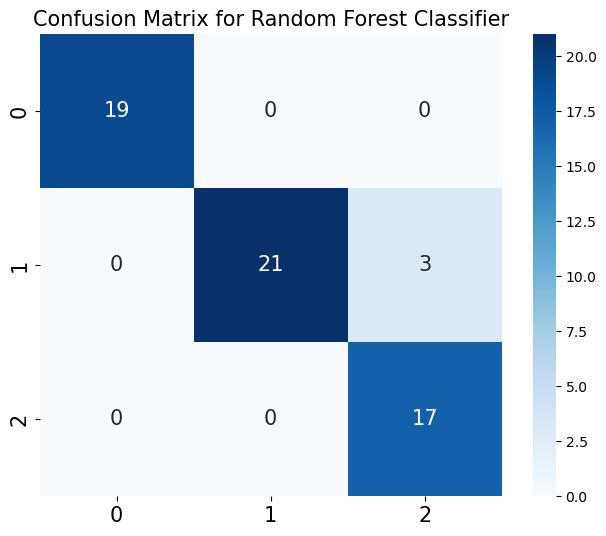

In [262]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [263]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [264]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [265]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

The accuracy of the Logistic Regression is: 95.0 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.96      0.92      0.94        24
           2       0.89      0.94      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



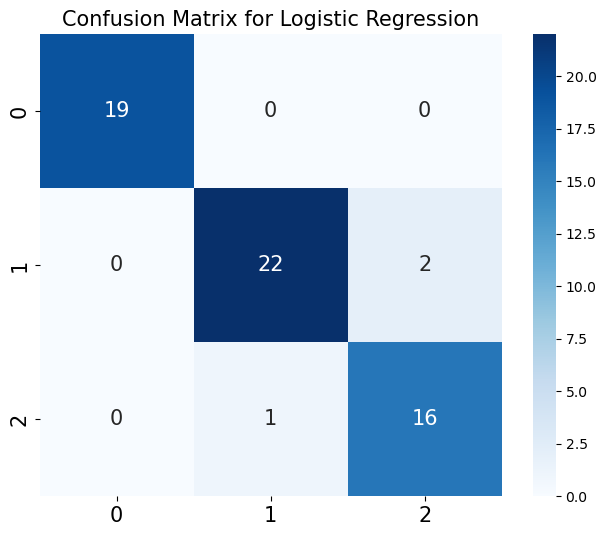

In [266]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')